In [17]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [18]:
data = pd.read_csv('data/train.csv')


In [19]:
x = data.drop(['SalePrice'],axis=1)
y = data['SalePrice']

In [20]:
x = x.drop(['MasVnrArea'],axis=1)
x = x.drop(['GarageYrBlt'],axis=1)
x = x.drop(['LotFrontage'],axis=1)

In [21]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#x.dtypes
converts = []
contador = 0
for i in x.dtypes:
    if 'object' == str(i):
        converts.append(contador)
    contador = contador + 1

converts

for i in converts:
    x.iloc[:,i] = le.fit_transform(x.iloc[:,i])


x.dtypes

x.isna().sum().sort_values()


Id               0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
Exterior1st      0
RoofMatl         0
RoofStyle        0
Foundation       0
SaleCondition    0
Length: 77, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

tree = DecisionTreeRegressor(criterion='mse')    

model = RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=10, min_samples_split= 5,min_samples_leaf=2)
#model = GradientBoostingRegressor(loss='squared_error', learning_rate= 0.1 , n_estimators = 100)

model.fit(x, y)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

Feature: 0, Score: 0.00344
Feature: 1, Score: 0.00106
Feature: 2, Score: 0.00225
Feature: 3, Score: 0.01186
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00036
Feature: 6, Score: 0.00154
Feature: 7, Score: 0.00088
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00065
Feature: 10, Score: 0.00050
Feature: 11, Score: 0.00699
Feature: 12, Score: 0.00044
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00015
Feature: 15, Score: 0.00064
Feature: 16, Score: 0.60064
Feature: 17, Score: 0.00394
Feature: 18, Score: 0.01059
Feature: 19, Score: 0.00682
Feature: 20, Score: 0.00062
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00160
Feature: 23, Score: 0.00077
Feature: 24, Score: 0.00096
Feature: 25, Score: 0.00381
Feature: 26, Score: 0.00031
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00342
Feature: 29, Score: 0.00016
Feature: 30, Score: 0.00214
Feature: 31, Score: 0.00143
Feature: 32, Score: 0.02987
Feature: 33, Score: 0.00009
Feature: 34, Score: 0.00030
Feature: 35, Score: 0.00472
Fe

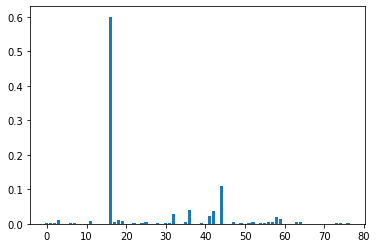

In [23]:
from matplotlib import pyplot
trash = []
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
 if v < 0.1:
    trash.append(i)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [24]:
x = x.drop(x.columns[trash],axis = 1)

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=10, min_samples_split= 5,min_samples_leaf=2)

model.fit(x, y)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [26]:
dataTest = pd.read_csv('data/test.csv')

dataTest.head()

dataTest = dataTest.drop(['MasVnrArea'],axis=1)
dataTest = dataTest.drop(['GarageYrBlt'],axis=1)
dataTest = dataTest.drop(['LotFrontage'],axis=1)

dataTest = dataTest.drop(dataTest.columns[trash],axis = 1)

In [27]:
pred = model.predict(dataTest)

In [28]:
dataTest = pd.read_csv('data/test.csv')

submission = {}
submission['Id'] = dataTest['Id']
submission['SalePrice'] = pred


submission = pd.DataFrame(submission)

In [29]:
submission.head()

submission.to_csv("submission.csv",index=False)